In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import math
from numpy import linalg as LA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib notebook

### Gradient Descent

*Gradient Descent* is an algorithm for finding the minimums of multi-variable functions.  In Machine Learning, gradient descent is used to find (hopefully) the minimum of the loss function.  If the graph (a multi-dimensional surface) of the loss function is *convex*, then the minimum can always be found (approximately).  However, if the graph of the loss function is non-convex, then it is not guarenteed that the *global minimum* will always be found.  Luckily for us, in this class the two loss functions that we use have graphs that are convex.

In the previous notebook, we saw the standard loss function for *linear regression*, the so-called *Mean Squared Error* loss function

$$L_{MSE} = \frac{1}{N}\sum_{i=1}^N (y_i-\hat{y}_i)^2$$

Recall that $L_{MSE}$ is a function of the parameters $\beta_0, \beta_1,...,\beta_n$ for our model $f(x_i) = \beta_0+\beta_1x_{i1}+\beta_2x_{i2}+...+\beta_nx_{in}$, where $x = (x_{i1},x_{i2},...,x_{in},y_i)$ is an arbitrary row in our dataset.  Thus, $L_{MSE}$ could be rewritten as 

$$L_{MSE}(\beta_0, \beta_1,...,\beta_n) = \frac{1}{N}\sum_{i=1}^N (y_i-(\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+...+\beta_nx_{in}))^2$$

where all $x_{ij}$'s and $y_i$'s are fixed real numbers.  Similarly, $L_{BCE}$ and $L_{GEN}$ given below are functions of the parameters for their respective models.

When we study *Logistic Regression* in the next notebook, we will become familiar with the *Binary Cross Entropy* loss function 

$$L_{BCE} = -\frac{1}{N}\sum_{i=1}^N (y_i\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i))$$

For our purposes today, we will consider the general loss function

$$L_{GEN} = \frac{1}{N}\sum_{i=1}^NL(y_i, \hat{y}_i)$$

where we do not specify what the formula for $L(y_i, \hat{y}_i)$ actually is.

In the special case of $L_{MSE}$, $L(y_i, \hat{y}_i)=(y_i-\hat{y}_i)^2$.

In the special case of $L_{BCE}$, $L(y_i, \hat{y}_i)=(y_i\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i))$.

The basic idea for gradient descent is this: given a point $x_i$ on the graph of a multi-dimensional function $f$, 

$$x_{i+1}=x_i-\eta \cdot \nabla f$$ 

where $\nabla f$ is the *gradient* of $f$ at the point $x_i$ and $\eta$ is a small number (often $\eta = 0.01$).

+ $\eta$ is called the *learning rate*.  This value controls the step size from $x_i$ to $x_{i+1}$.
+ The gradient is a function that tells the direction of steepest ascent on the graph of $f$.  The gradient is a generalization of the derivative.

##### Example 1

We use gradient descent to find the minimum of $f(x,y)=\frac{1}{20}x^2+8y^2$.  Note that $f(x,y)$ is far simpler than any loss function.

In [2]:
def f(x, y):
    return (x**2)/20+(y**2)/(0.125)

Gradient: $\nabla f=\begin{pmatrix}
    \frac{df}{dx}\\
    \frac{df}{dy}\\
\end{pmatrix}=\begin{pmatrix}
    \frac{1}{10}x\\
    16y\\
\end{pmatrix}$.

In [3]:
def f_x(x):
    return 0.1*x

In [4]:
def f_y(y):
    return 16*y

In [5]:
def next_x(x, eta): 
    return x-eta*np.array([[f_x(x[0][0])],[f_y(x[1][0])]])

In [6]:
#start is starting point, tol is tolerance.
def gradientDescent(start, learningRate, tol):
    x=[]
    steps=0
    x.append(start)
    while LA.norm(x[-1])>tol:
        steps+=1
        temp=next_x(x[-1],learningRate)
        x.append(temp)
        
    return x, steps

Starting point: $x_0=(10^3, 10^2)$.

Learning Rate: $\eta = 0.1$. 

In [8]:
X=gradientDescent(np.array([[10**3],[10**2]]), 0.1, 0.1)

In [9]:
num_steps = X[1]
f'The number of steps needed to get within 0.1 of the minimum: {num_steps}.'

'The number of steps needed to get within 0.1 of the minimum: 917.'

<IPython.core.display.Javascript object>


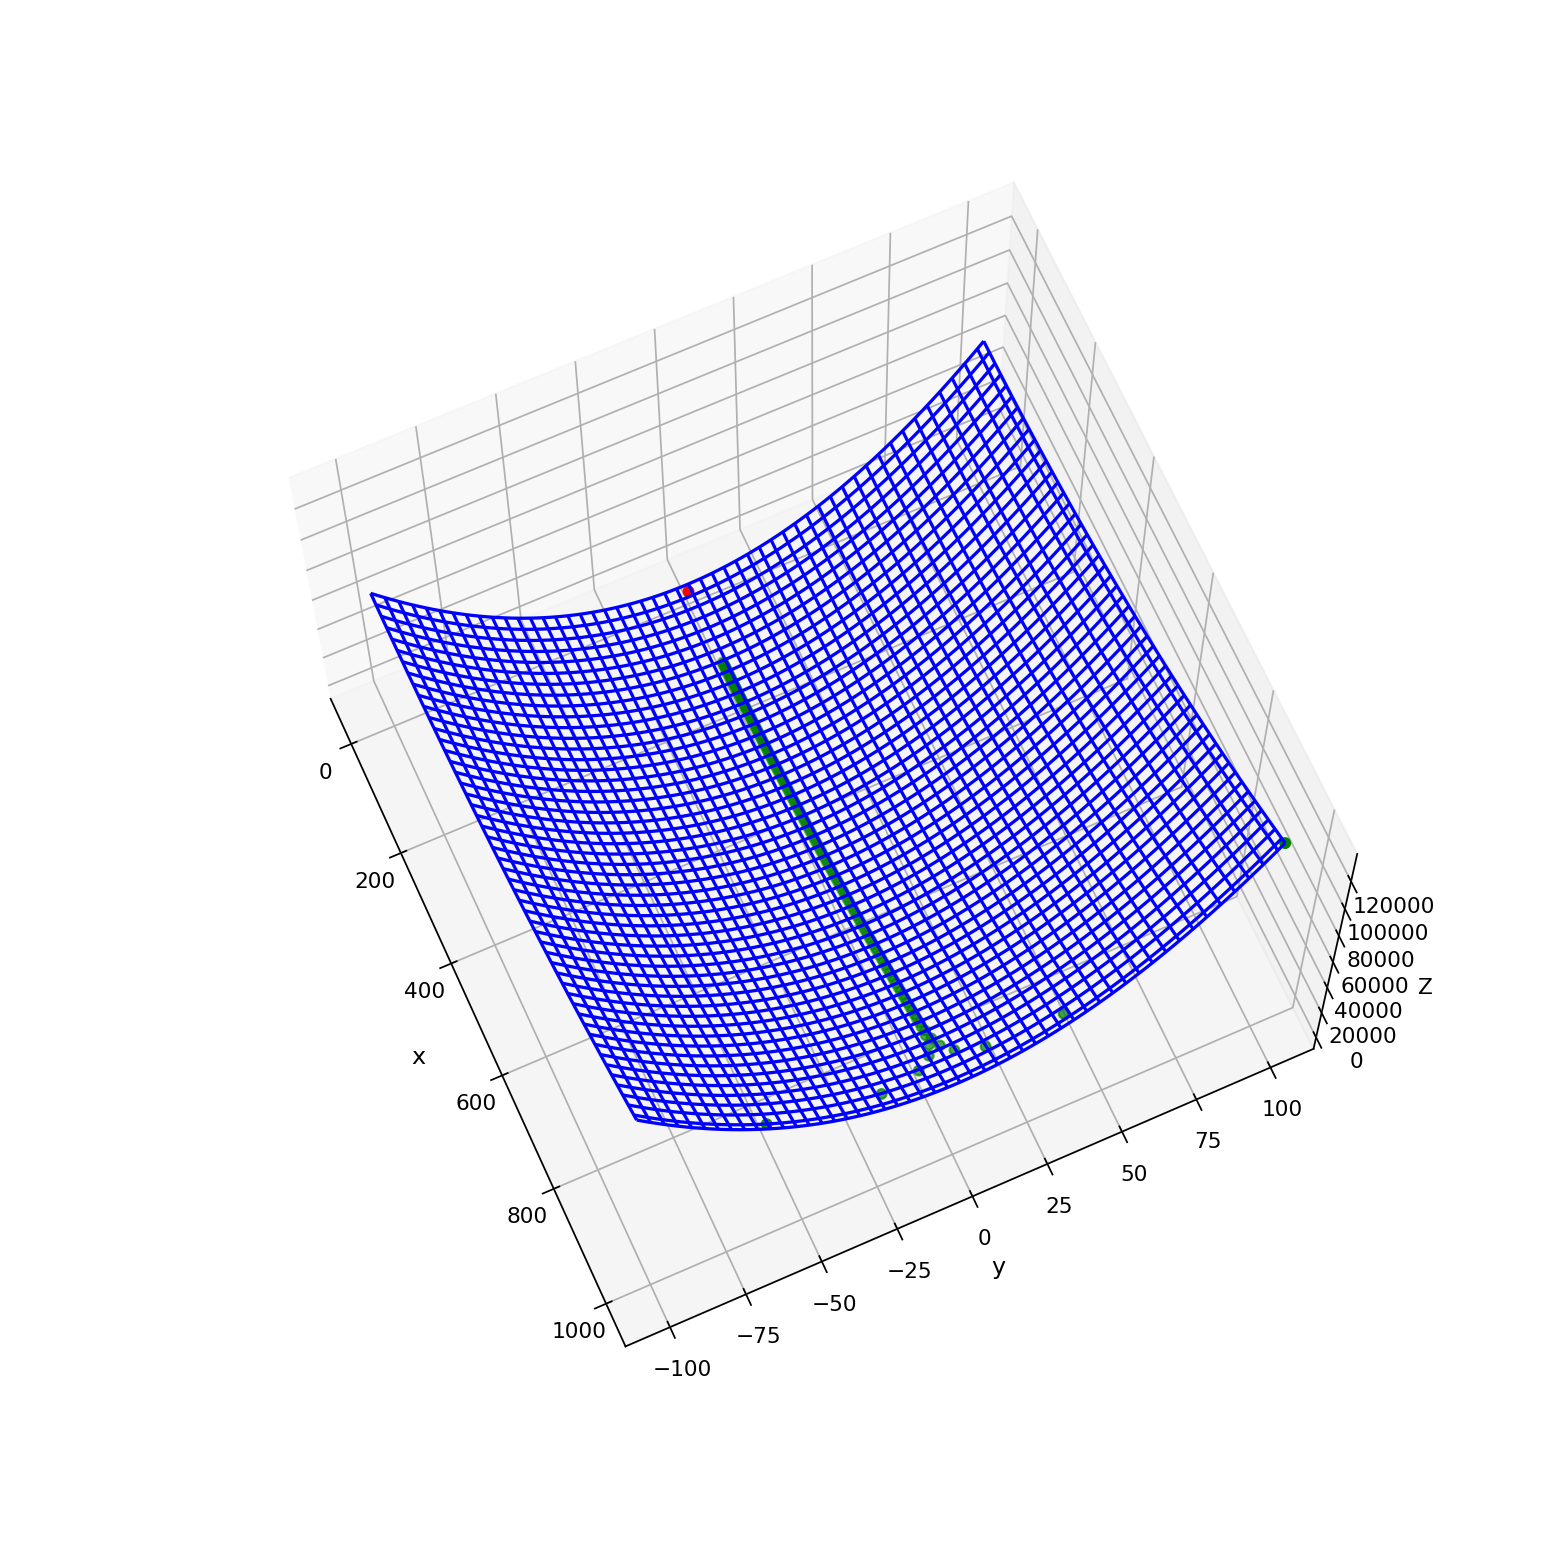

Text(0.5, 0, 'Z')

In [10]:
x_val=[X[0][i][0][0] for i in np.arange(len(X[0]))]
y_val=[X[0][i][1][0] for i in np.arange(len(X[0]))]
z_val=[f(x_val[i],y_val[i]) for i in np.arange(len(X[0]))]
m=200
x = np.linspace(-10, 1000, 100)
y = np.linspace(-100, 100, 100)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis_r', edgecolor='none')
ax.plot_wireframe(X,Y,Z,color="blue")
#ax.plot3D(np.array([1000,994]), np.array([100,2]), np.array([130000,49433.8]), linewidth=3, color='Red')
ax.scatter3D(np.array([0]), np.array([0]), np.array([0]), color='Red')
ax.scatter3D(np.array(x_val[0:m]), np.array(y_val[0:m]), np.array(z_val[0:m]), color='Green')
#ax.set_title("z=(x^2)/20+8y^2", fontsize = 13)
ax.set_xlabel('x', fontsize = 11)
ax.set_ylabel('y', fontsize = 11)
ax.set_zlabel('Z', fontsize = 10)

Starting point: $x_0=(10^3, 10^2)$.

Learning Rate: $\eta = 0.01$.

In [11]:
X=gradientDescent(np.array([[10**3],[10**2]]), 0.01, 0.1)

In [12]:
num_steps = X[1]
f'The number of steps needed to get within 0.1 of the minimum: {num_steps}.'

'The number of steps needed to get within 0.1 of the minimum: 9206.'

<IPython.core.display.Javascript object>


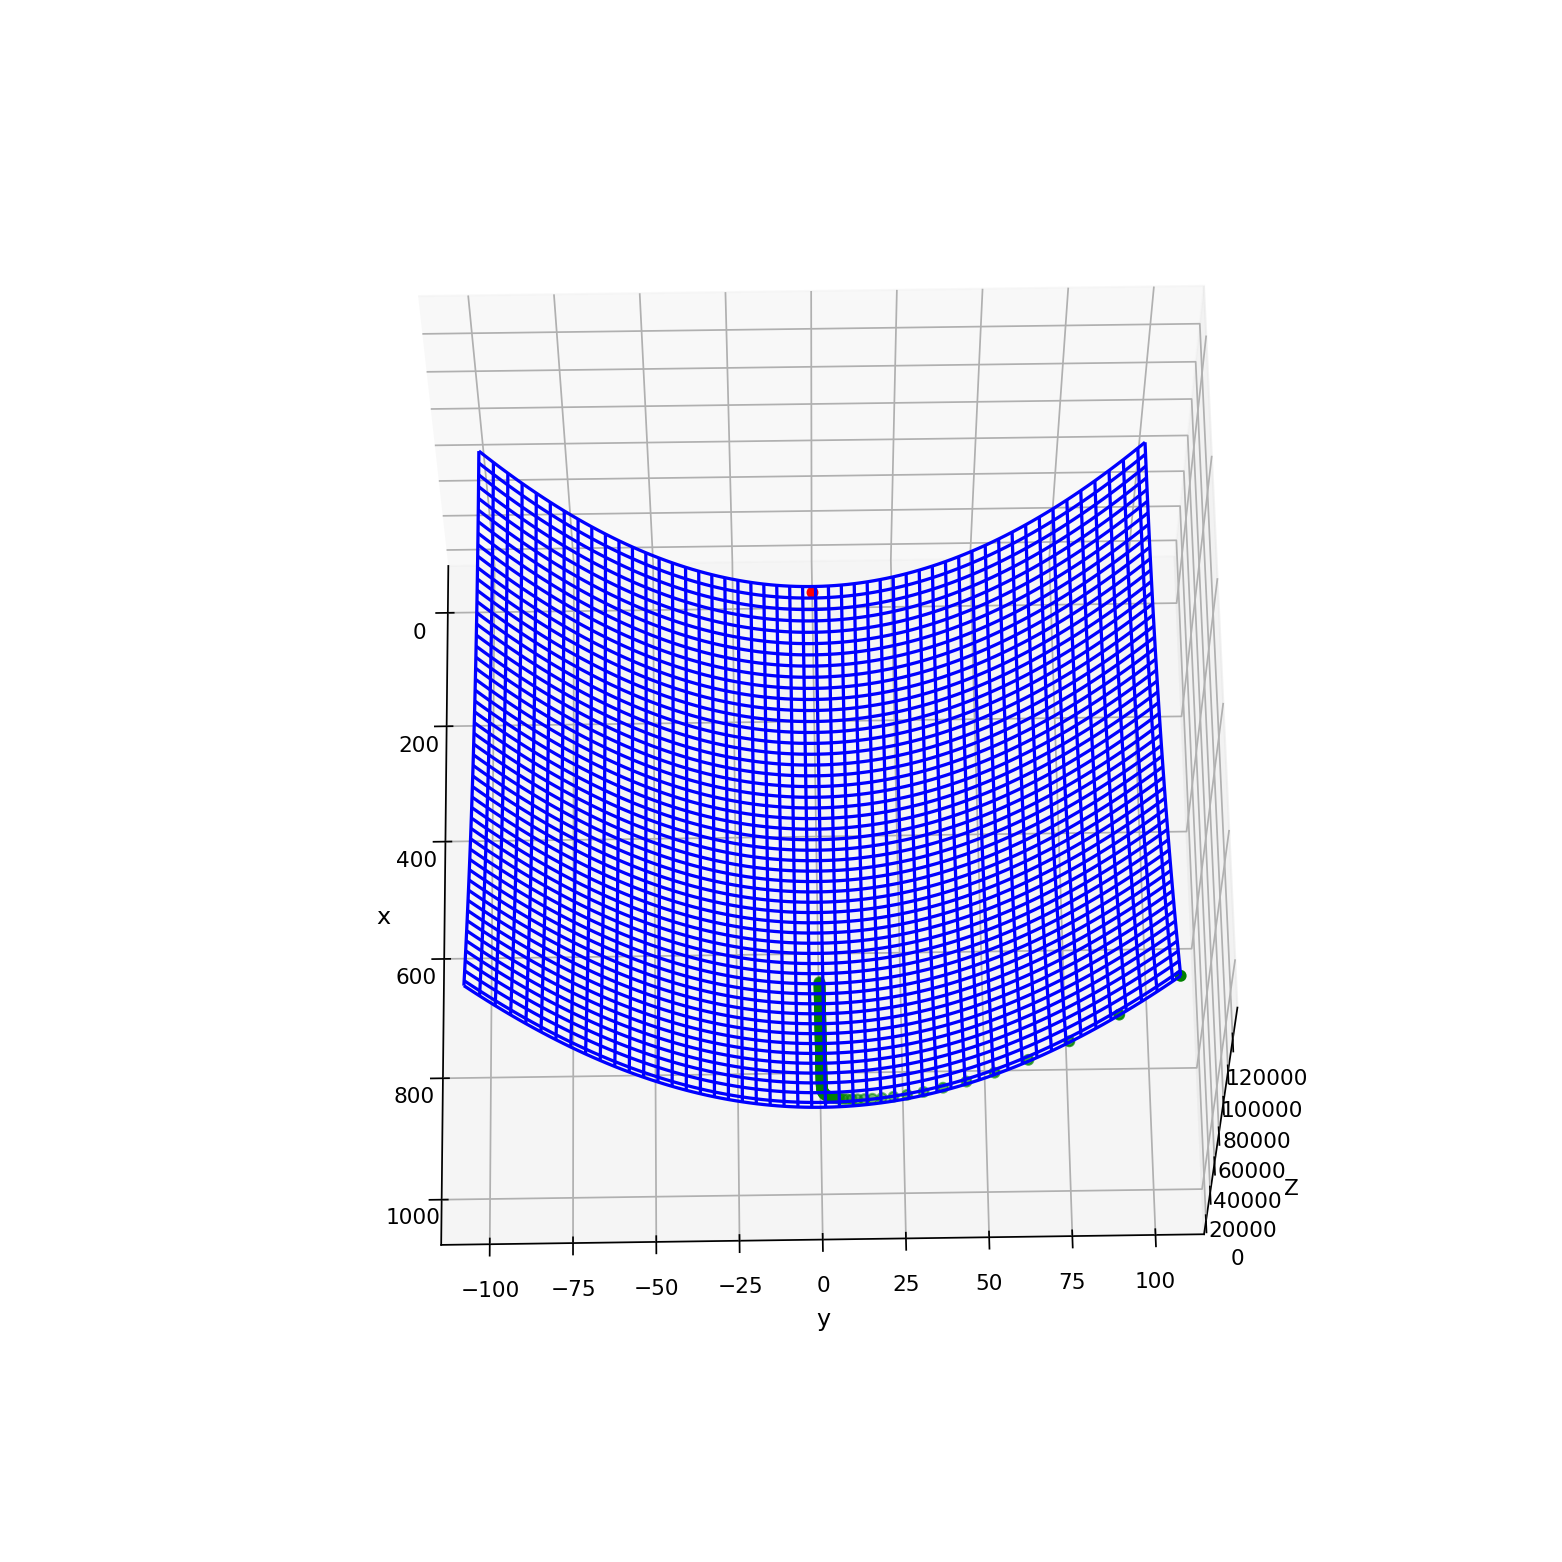

Text(0.5, 0, 'Z')

In [13]:
x_val=[X[0][i][0][0] for i in np.arange(len(X[0]))]
y_val=[X[0][i][1][0] for i in np.arange(len(X[0]))]
z_val=[f(x_val[i],y_val[i]) for i in np.arange(len(X[0]))]
m=300
x = np.linspace(-10, 1000, 100)
y = np.linspace(-100, 100, 100)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis_r', edgecolor='none')
ax.plot_wireframe(X,Y,Z,color="blue")
#ax.plot3D(np.array([1000,994]), np.array([100,2]), np.array([130000,49433.8]), linewidth=3, color='Red')
ax.scatter3D(np.array([0]), np.array([0]), np.array([0]), color='Red')
ax.scatter3D(np.array(x_val[0:m]), np.array(y_val[0:m]), np.array(z_val[0:m]), color='Green')
#ax.set_title("z=(x^2)/20+8y^2", fontsize = 13)
ax.set_xlabel('x', fontsize = 11)
ax.set_ylabel('y', fontsize = 11)
ax.set_zlabel('Z', fontsize = 10)

$\Box$

#### Computing the Gradient of a Loss Function

Our goal is to compute the gradient of the loss function

$$L_{GEN} = \frac{1}{N}\sum_{i=1}^NL(y_i, \hat{y}_i)$$

The gradient is *linear* (most of the time).  This means that: 

+ The gradient is additive.
    + For two multi-variable functions $f$ and $g$, $\nabla(f+g) = \nabla f + \nabla g$.
    
+ Scalar multiplication holds for the gradient.
    + $\nabla a\cdot f = a \cdot \nabla f$, where $a$ is a real number.

Using the linearity of the gradient, we can now compute $\nabla L_{GEN}$.

$\nabla L_{GEN} $

$= \nabla(\frac{1}{N}\sum_{i=1}^NL(y_i, \hat{y}_i))$

$= \frac{1}{N} \cdot \nabla(\sum_{i=1}^NL(y_i, \hat{y}_i))$

$= \frac{1}{N} \cdot \nabla(L(y_1, \hat{y}_1)+L(y_2, \hat{y}_2)+...+L(y_N, \hat{y}_N))$

$= \frac{1}{N} \cdot (\nabla L(y_1, \hat{y}_1)+\nabla L(y_2, \hat{y}_2)+...+\nabla L(y_N, \hat{y}_N))$

$= \frac{1}{N}\sum_{i=1}^N \nabla L(y_i, \hat{y}_i)$.

#### Types of Gradient Descent

Ideally, we would always be able to use the fact that $\nabla L_{GEN} = \frac{1}{N}\sum_{i=1}^N \nabla L(y_i, \hat{y}_i)$ to compute the gradient at each step of the gradient descent algorithm.  However, when $N$ (the number of rows in our dataset) is large, this is *computationally unfeasible*.  Thus, a subset of the terms in $L_{GEN}$ is often used to determine the direction to descend.

That is, at each step of the gradient descent algorithm, we randomly select (without replacement) $M\geq 1$ of the $N$ terms in $L_{GEN}$ and compute $\frac{1}{M}\sum_{i=1}^M \nabla L(y_i, \hat{y}_i)$ to determine the direction to descend.

##### Batch Gradient Descent

If $M=N$, then the full gradient is computed at each step.  This is called *Batch* Gradient Descent.

##### Mini-Batch Gradient Descent

If $1 < M<N$, then a subset of the $N$ terms is selected to compute the gradient at each step.  This is called *Min-Batch* Gradient Descent.

##### Stochastic Gradient Descent

If $M=1$, then the only $1$ term is selected to compute the gradient at each step.  This is called *stochastic* Gradient Descent.

Stochastic Gradient Descent was used to train our linear regression models in the previous notebook and it will be used to train our logistic regression models in the next notebook.